# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

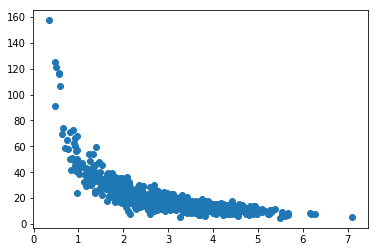

In [1]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [2]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

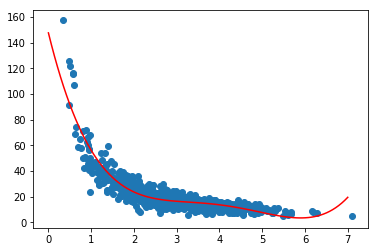

In [3]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303074


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x)

Why Polynomial Regression:

There are some relationships that a researcher will hypothesize is curvilinear. Clearly, such type of cases will include a polynomial term.
Inspection of residuals. If we try to fit a linear model to curved data, a scatter plot of residuals (Y axis) on the predictor (X axis) will have patches of many positive residuals in the middle. Hence in such situation it is not appropriate.

An assumption in usual multiple linear regression analysis is that all the independent variables are independent. In polynomial regression model, this assumption is not satisfied.

Uses of Polynomial Regression:These are basically used to define or describe non-linear phenomenon such as:

Growth rate of tissues.

Progression of disease epidemics

Distribution of carbon isotopes in lake sediments

In [15]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# Importing the dataset 
datas = pd.read_csv('D:\DATA SCIENCE\data set\python/data.csv') 
datas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
sno            6 non-null int64
Temperature    6 non-null int64
Pressure       6 non-null float64
dtypes: float64(1), int64(2)
memory usage: 184.0 bytes


In [6]:
X = datas.iloc[:, 1:2].values 
y = datas.iloc[:, 2].values 


In [7]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

lin.fit(X, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

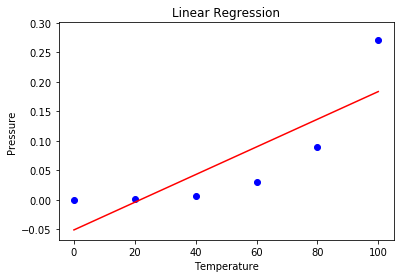

In [9]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 

plt.show() 


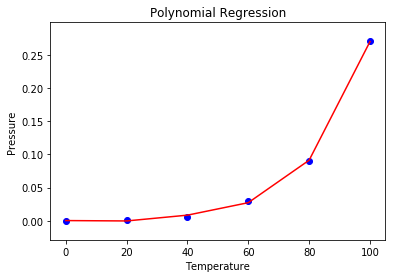

In [10]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 

plt.show() 


In [11]:
# Predicting a new result with Linear Regression 
lin.predict(110.0) 


array([0.20675333])

In [12]:
# Predicting a new result with Polynomial Regression 
lin2.predict(poly.fit_transform(110.0)) 


array([0.43295877])